In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [27]:
df = pd.read_csv(r"C:\Users\venka\Downloads\archive (4)\heart.csv")

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [29]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

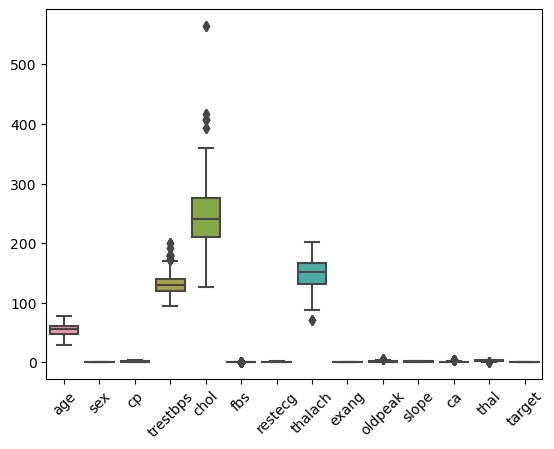

In [30]:
sns.boxplot(data = df)
plt.xticks(rotation  = 45 )
plt.show()

In [31]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [32]:
cols  = [ 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [33]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [34]:
for c in cols : 
    print(df[c])

0       125
1       140
2       145
3       148
4       138
       ... 
1020    140
1021    125
1022    110
1023    110
1024    120
Name: trestbps, Length: 1025, dtype: int64
0       212
1       203
2       174
3       203
4       294
       ... 
1020    221
1021    258
1022    275
1023    254
1024    188
Name: chol, Length: 1025, dtype: int64
0       0
1       1
2       0
3       0
4       1
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Name: fbs, Length: 1025, dtype: int64
0       168
1       155
2       125
3       161
4       106
       ... 
1020    164
1021    141
1022    118
1023    159
1024    113
Name: thalach, Length: 1025, dtype: int64
0       1.0
1       3.1
2       2.6
3       0.0
4       1.9
       ... 
1020    0.0
1021    2.8
1022    1.0
1023    0.0
1024    1.4
Name: oldpeak, Length: 1025, dtype: float64
0       2
1       0
2       0
3       1
4       3
       ..
1020    0
1021    1
1022    1
1023    0
1024    1
Name: ca, Length: 1025, dtype: int64
0       3

In [35]:
for c in cols :
    sk = df[c].skew().round()
    print(c, end = "==>")
    print(sk)   

trestbps==>1.0
chol==>1.0
fbs==>2.0
thalach==>-1.0
oldpeak==>1.0
ca==>1.0
thal==>-1.0


In [36]:
for c in cols :
    sk = df[c].skew().round()
    if sk == 0 or sk == -0:
        print("Normal Distribution")
    else : 
        print("Skwed Distribution")

Skwed Distribution
Skwed Distribution
Skwed Distribution
Skwed Distribution
Skwed Distribution
Skwed Distribution
Skwed Distribution


In [37]:
for c in cols :
    sk = df[c].skew().round()
    if sk == 0 or sk == -0:
        m = df[c].mean()
        s = df[c].std()
        lowerlimit = m - 3*s
        upperlimit = m + 3*s
        df[c].map(lambda x :  lowerlimit if x < lowerlimit else upperlimit if x > upperlimit else x)
    
    else : 
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)
        df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x)

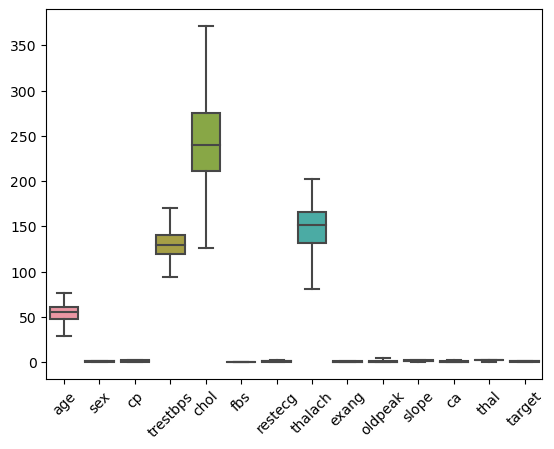

In [39]:
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()